# Medial Axis code again but this time in python

Here, we should be able to 
- import objects (including herbert's list of objects) 
- find a radial filtration of them
- find the radial filtration for every point in a grid (?) (what did we say about this again? were we doing it this was or finding it backwards somehow from vineyards?)
- we need to maintain the relationship of which simplex gives rise to which filtration value 
- compute persistence in the matrix
- extend this to computing vineyards

## Matrix Reduction Algorithm
First, we begin with a compatible ordering of the simplices, ie, a sequence $\sigma_1, \sigma_2, \ldots, \sigma_m$ such that $f(\sigma_i) < f(\sigma_j)$ implies $i < j$ and so does $\sigma_i$ being a face of $\sigma_j$.Such an ordering exists because $f$ is monotonic. 

The algorithm uses column operations to reduce $\delta$ to another $0-1$ matrix $R$. Let $low(j)$ be the row index of the lowest one in column $j$. If the entire colum is zero, then $low(j)$ is undefined. We call $R$ reduced if $low(j) \neq low(j_0)$ whenever $j \neq j_0$ specify two non-zero columns. The algorithm reduces $\delta$ by adding columns left to right. 

We set up the boundary matrix $\delta$ such that $\delta[i,j] = \begin{equation}
\left\{ 
  \begin{aligned}
    0 &; \text{ if } \sigma_i \text{ is a codimension-1 face of }\sigma_j\\
    1 &; \text{ else}\\
  \end{aligned}
  \right.
\end{equation}$

ALG ONE
```
R = delta
for j = 1 to m do:
    while there exists j0 < j with low(j0) = low(j) do:
        add column j0 to j
    endwhile.
endfor.
```
When this algorithm terminates, we have a reduced matrix that gives us the following information: 
- if a column j has a lowest one at row i, then [i,j) corresponds to a birth-death pair: simplex i gives birth to a homology class that is killed by j


Input: an .stl file with simplice types and vertex positions given
- sample a grid G across the input, and for each x in the vertices of G, do the following: 
    - order the input simplices according to the squared pointed distance function from x
    - do matrix reduction on resulting boundary matrix
- subdivide region according to when type 3 knees have occurred
- if a type 3 knee has occurred somewhere between two grid points, then we compute vineyards between them, that is, we do a series of switches in the ordering one at a time (the order of switching we have to choose arbitrarily) using the vineyards algorithm defined in the paper, and when we find the interchange giving rise to the knee, we mark that spot as being on the medial axis and update the regions accordingly
- output: we end with regions approximating the tesselation of space by the medial axis, and the approximation of the medial axis is the boundaries of these regions


Questions: 
- to compute reduced homology, do we just append a dummy simplex at the beginning, and we don't have to change the algorithm otherwise? 
- infinite-persistence. 
- is it the same to check to the left as to the right in Alg One to see if the low is unique so far? 


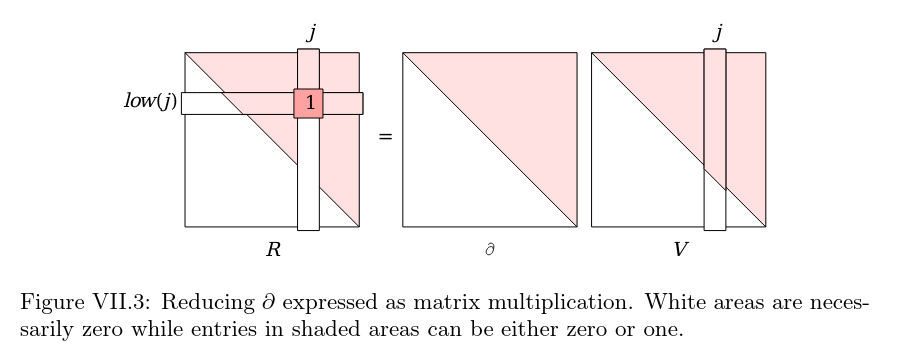

In [1]:
import numpy as np
import pandas as pd

def highlight_cells(val):
    color = '#FFC6c4' if val == 1 else ''
    style='display:inline'
    return 'background-color: {}'.format(color)

delta = np.array([\
         [0,1,0,0,0,0,0,0],\
         [0,0,0,0,1,0,0,0],\
         [0,0,0,0,1,1,0,0],\
         [0,0,0,0,0,1,0,0],\
         [0,0,0,0,0,0,0,1],\
         [0,0,0,0,0,0,0,1],\
         [0,0,0,0,0,0,0,1],\
         [0,0,0,0,0,0,0,0]])


df1_styler = pd.DataFrame(delta).style.\
    applymap(highlight_cells).\
    set_table_attributes("style='display:inline'").\
    set_caption('Original boundary matrix')
# display call has to be here 
# even if we change delta to temp_delta, df1 updates to be the 
# same as df2 if we call them at the same time! Super weird.
# consider not using Pandas if it's going to mess up data. 
# is this one of those class issues with python where it 
# updates the object used by the entire class?
display(df1_styler)

# here we alter the matrix
delta[:,5] = (delta[:,4] + delta[:,5]) % 2

df2_styler = pd.DataFrame(delta).style.\
    applymap(highlight_cells).\
    set_table_attributes("style='display:inline'").\
    set_caption('One column addition')


display(df2_styler)

,0,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0


# Testing sandbox

In [2]:
import numpy as np
import pandas as pd

def highlight_cells(val):
    color = '#FFC6c4' if val == 1 else ''
    style='display:inline'
    return 'background-color: {}'.format(color)

delta = np.array([\
         [0,0,1,0,1,0,0],\
         [0,0,1,0,0,1,0],\
         [0,0,0,0,0,0,1],\
         [0,0,0,0,1,1,0],\
         [0,0,0,0,0,0,1],\
         [0,0,0,0,0,0,1],\
         [0,0,0,0,0,0,0]])

df1_styler = pd.DataFrame(delta).style.\
    applymap(highlight_cells).\
    set_table_attributes("style='display:inline'").\
    set_caption('Original boundary matrix')
# display call has to be here 
# even if we change delta to temp_delta, df1 updates to be the 
# same as df2 if we call them at the same time! Super weird.
# consider not using Pandas if it's going to mess up data. 
# is this one of those class issues with python where it 
# updates the object used by the entire class?
display(df1_styler)

# here we alter the matrix
delta[:,5] = (delta[:,4] + delta[:,5]) % 2

df2_styler = pd.DataFrame(delta).style.\
    applymap(highlight_cells).\
    set_table_attributes("style='display:inline'").\
    set_caption('One column addition: adding 4 to 5')

display(df2_styler)

# here we alter the matrix
delta[:,5] = (delta[:,2] + delta[:,5]) % 2

df3_styler = pd.DataFrame(delta).style.\
    applymap(highlight_cells).\
    set_table_attributes("style='display:inline'").\
    set_caption('Two column additions: adding 2 to 5')

display(df3_styler)

,0,1,2,3,4,5,6
0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0


,0,1,2,3,4,5,6
0,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0


,0,1,2,3,4,5,6
0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0


# BUGSES 

- See display of stylers issue about matrix updates

# TO DO 
- get pandas to display horizontally. See https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side; it seems like matplotlib objects are also html objects, so theoretically one could have matrices right next to tables. 